In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


In [2]:
flight_dataset = pd.read_csv('Clean_Dataset.csv')
flight_dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Droping the unnecessary column 'Unnamed: 0'
flight_datase = flight_dataset.drop('Unnamed: 0', axis = 1)

# Data Analysis

In [4]:
# A Quick Information abou the Data
flight_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Checking for null values and duplicate values in the flight_dataset.

In [5]:
flight_dataset.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

We have 0 null values in every column. Next checking for duplicate values.

In [6]:
# Check for duplicate values in flight_dataset
duplicates = flight_dataset[flight_dataset.duplicated()]

# Print result
print("No duplicate values" if duplicates.empty else f"Duplicates found: {duplicates}")


No duplicate values


In [7]:
# Stastical Description of Data
flight_dataset.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


We can see from the stastical data, the average flight duration is 12.22 hours, minimum duration of flight is 0.83 hours and maximum duration is 49.83 hours. The maximum price is 123071 rupee, minimum price is 1105 rupee.

In [8]:
# Grouping dataset by 'flight' and 'airline'
airline_flight = flight_dataset.groupby(['flight', 'airline'], as_index = False).count()
airline_flight.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

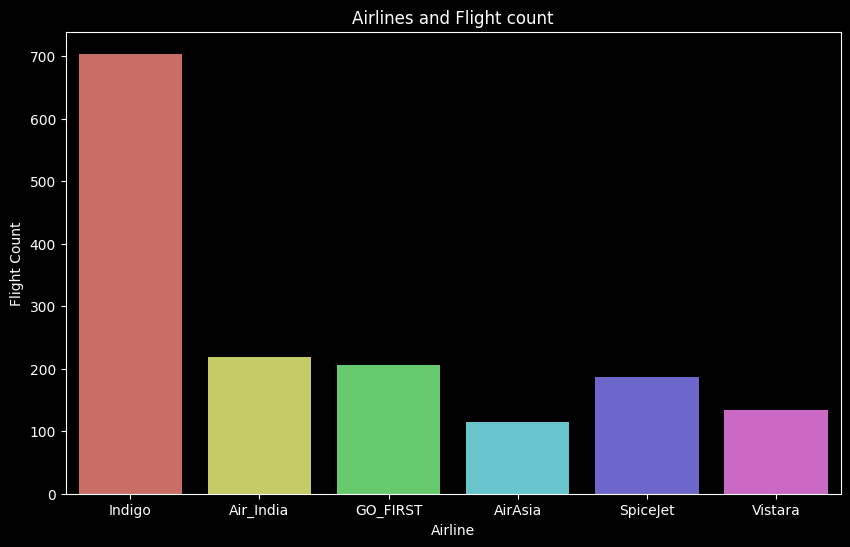

In [38]:
# Plotting the Airlines and number of flights each airline operates
plt.figure(figsize = (10, 6))
sns.countplot(data = airline_flight, x = 'airline', palette = 'hls')
plt.title('Airlines and Flight count')
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.show()

Indigo has the most flights followed by Air India, GO FIRST, AirAsia, Spicejet and Vistara. Top three airlines account for over 60% of all flights.

In [10]:
# Grouping dataset by class
airline_flight = flight_dataset.groupby(['flight', 'airline', 'class'], as_index = False).count()
airline_flight['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

Economy class has the highest seats booked overall the airlines.

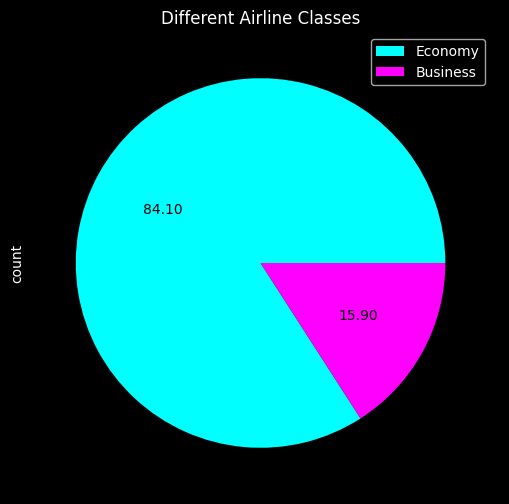

In [40]:
# Plotting the different classes
plt.figure(figsize = (8, 6))

# Extracting 'class' counts and plotting a pie chart
class_counts = airline_flight['class'].value_counts()
class_counts.plot(kind = 'pie', textprops = {'color': 'black'}, autopct = '%.2f', cmap = 'cool')
plt.title('Different Airline Classes')
plt.legend(class_counts.index)

plt.show()



About 84 percent of the tickets booked were economy and 15.90 percent were business tickets.

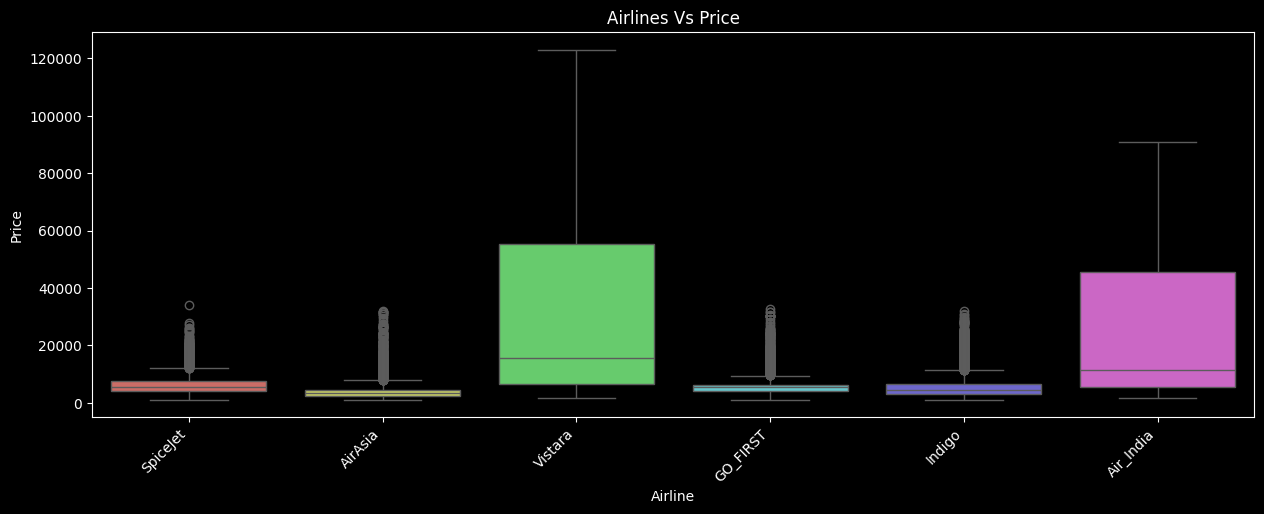

In [41]:
# Plotting Airlines vs Price of each airline
plt.figure(figsize = (15, 5))

# Using Seaborn's boxplot
sns.boxplot(x = 'airline', y = 'price', data = flight_dataset, palette = 'hls')
plt.title('Airlines Vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')

# Rotating x-axis labels for better readability
plt.xticks(rotation = 45, ha = 'right')
plt.show()


From the box plot we can say Indigo has the lowest median price. Air India has the highest IQR. There are less outliers for each airline, but most outliers are for Air India.

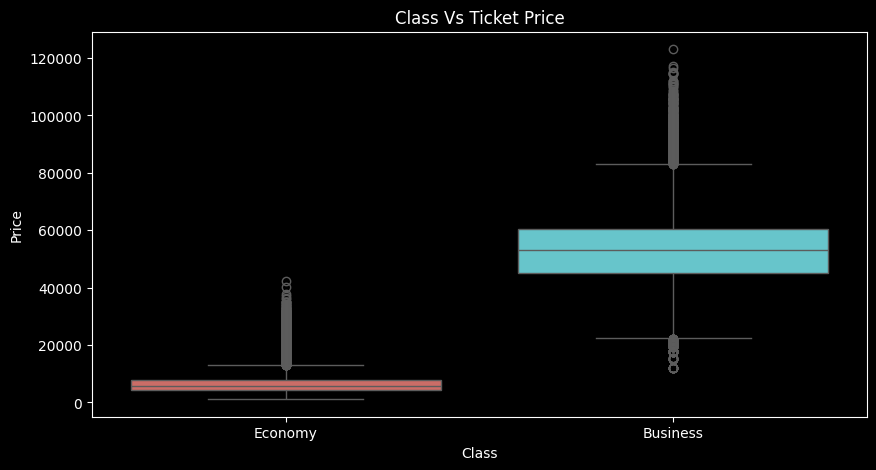

In [42]:
# Plotting class vs ticket price for each class
plt.figure(figsize = (10, 5))

# Using Seaborn's boxplot
sns.boxplot(x = 'class', y = 'price', data = flight_dataset, palette = 'hls')

plt.title('Class Vs Ticket Price')
plt.xlabel('Class')
plt.ylabel('Price')

plt.show()


Economy class has the lowest median ticket price, followed by business and first class. Economy class has the lowest IQR, followed by business class and first class. This suggests that economy class ticket costs are more closely related than business and first class ticket prices. There are a few outliers for each class of flight, but first class has the most outliers.



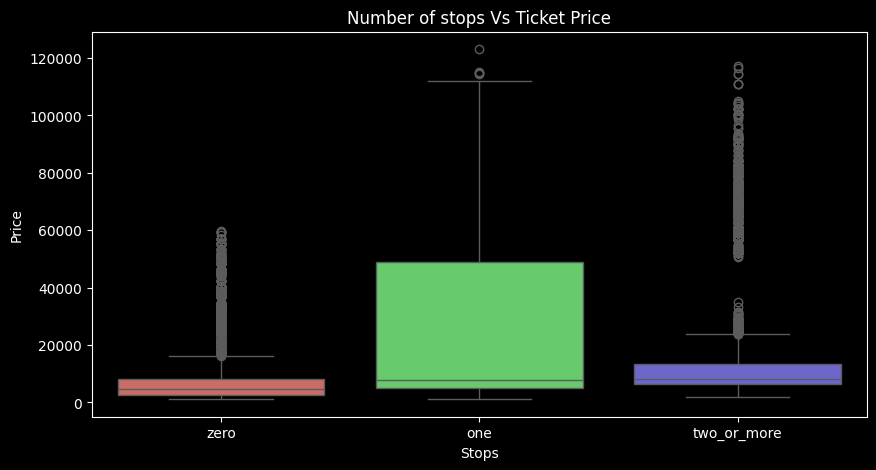

In [43]:
# PLotting number of stops vs price
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'stops', y = 'price', data = flight_dataset, palette = 'hls')
plt.title('Number of stops Vs Ticket Price')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()


Flights with zero stops have the lowest median ticket price, followed by flights with one stop and flights with two or more stops. Flights with zero stops have the lowest IQR, followed by flights with one stop and flights with two or more stops. This says that ticket costs for zero-stop flights are more closely related than ticket prices for one-stop and two-stop flights. There are a few outliers for each number of stops, but flights with two or more stops have the most outliers.



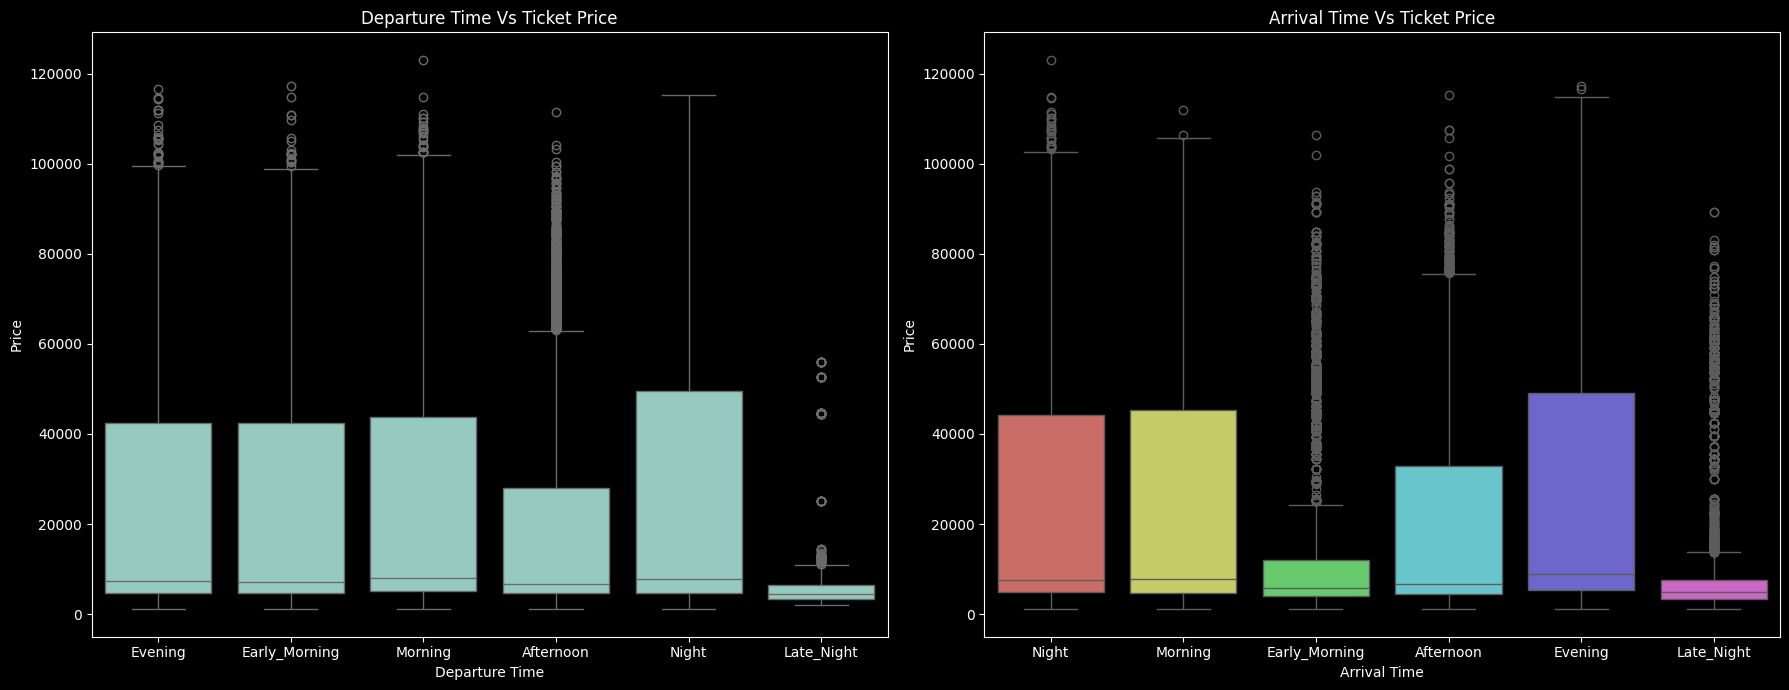

In [44]:
# Plotting Departure Time vs Ticket Price and Arrival Time vs Ticket Price side by side
plt.figure(figsize = (18, 7))

# Subplot 1: Departure Time vs Ticket Price
plt.subplot(1, 2, 1)
sns.boxplot(x = 'departure_time', y = 'price', data = flight_dataset)
plt.title('Departure Time Vs Ticket Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')

# Subplot 2: Arrival Time vs Ticket Price
plt.subplot(1, 2, 2)
sns.boxplot(x = 'arrival_time', y = 'price', data = flight_dataset, palette = 'hls')
plt.title('Arrival Time Vs Ticket Price')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


Evening flights have the lowest IQR, followed by afternoon flights and morning flights. This indicates that the costs for nighttime flights are more closely related than the rates for afternoon and morning flights. Evening flights have the lowest median ticket price, followed by afternoon flights and early flights. There are a few outliers for each departure period, but morning flights have the most outliers.

AirAsia has the earliest median arrival time, followed by Vistara, SpiceJet, Air India, GO_FIRST, and Indigo. AirAsia has the lowest IQR, followed by Vistara, SpiceJet, Air India, GO_FIRST, and Indigo. This signifies that AirAsia's arrival timings are closer together than the other carriers' arrival times. Each airline has a few outliers, but Indigo has the most outliers.







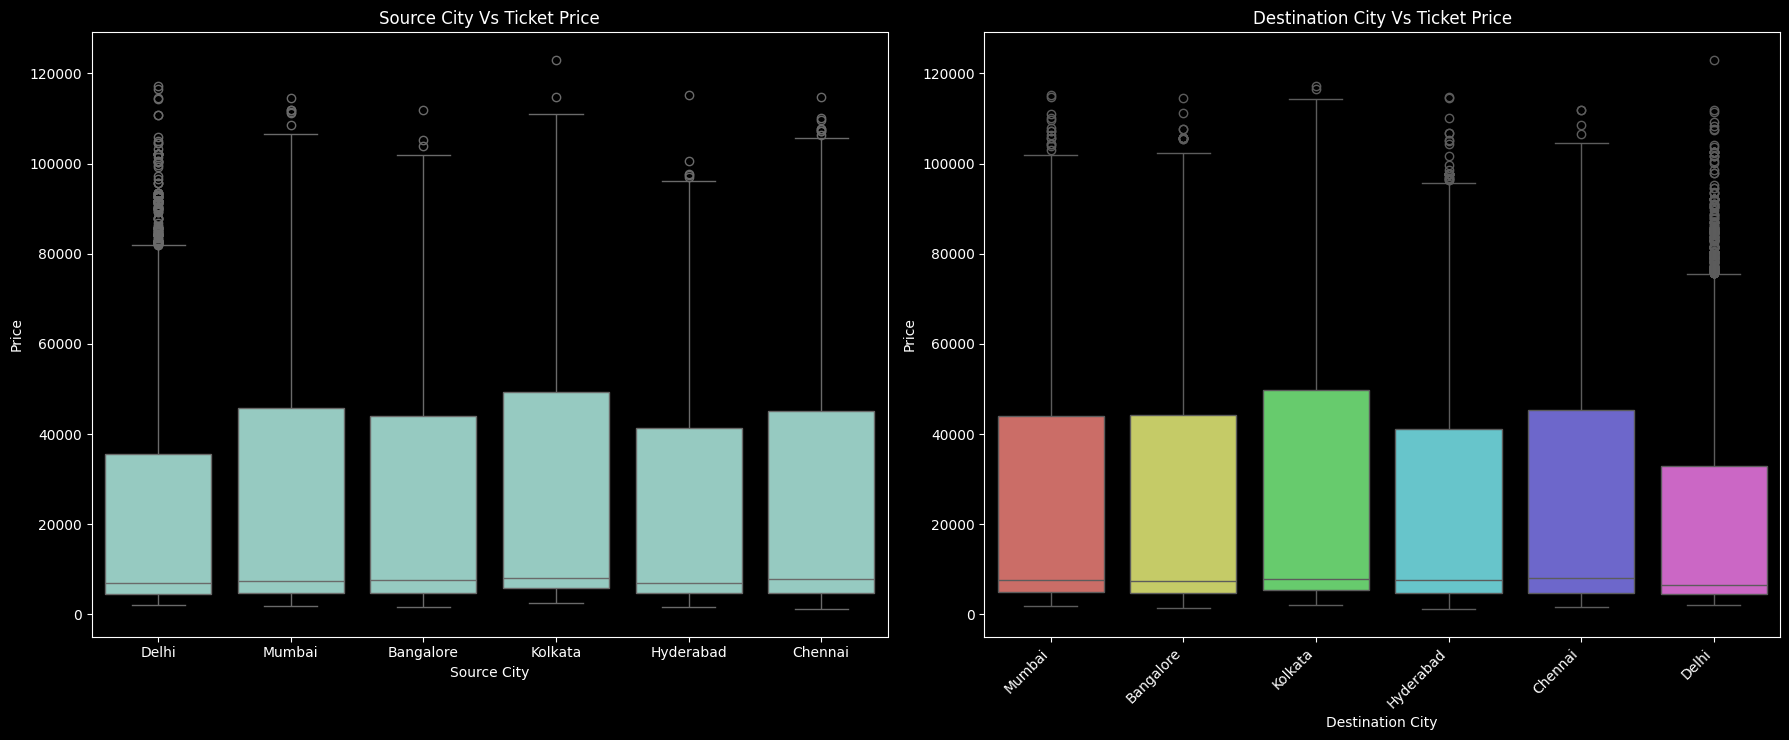

In [45]:
# Plotting Source City vs Ticket Price and Destination City vs Ticket Price
plt.figure(figsize = (18, 7))

# Subplot 1: Source City vs Ticket Price
plt.subplot(1, 2, 1)
sns.boxplot(x = 'source_city', y = 'price', data = flight_dataset)
plt.title('Source City Vs Ticket Price')
plt.xlabel('Source City')
plt.ylabel('Price')

# Subplot 2: Destination City vs Ticket Price
plt.subplot(1, 2, 2)
sns.boxplot(x = 'destination_city', y = 'price', data = flight_dataset, palette = 'hls')
plt.title('Destination City Vs Ticket Price')
plt.xlabel('Destination City')
plt.ylabel('Price')
plt.tight_layout()
plt.xticks(rotation = 45, ha = 'right')
plt.show()


Hyderabad has the lowest median ticket price, followed by Kolkata, Chennai, Delhi, Bangalore, and Mumbai. Hyderabad has the lowest IQR, followed by Kolkata, Chennai, Delhi, Bangalore, and Mumbai. This indicates that ticket prices in Hyderabad are more closely related to one another than in the other cities. There are a few outliers in each city, but Mumbai has the most.

Flights departing from Hyderabad have the lowest median ticket price, followed by Kolkata, Chennai, Delhi, Bangalore, and Mumbai. Flights departing from Hyderabad have the lowest IQR, followed by Kolkata, Chennai, Delhi, Bangalore, and Mumbai. This means that ticket rates for flights departing from Hyderabad are more concentrated than those for flights departing from other places. There are a few outliers in each city, but Mumbai has the most.






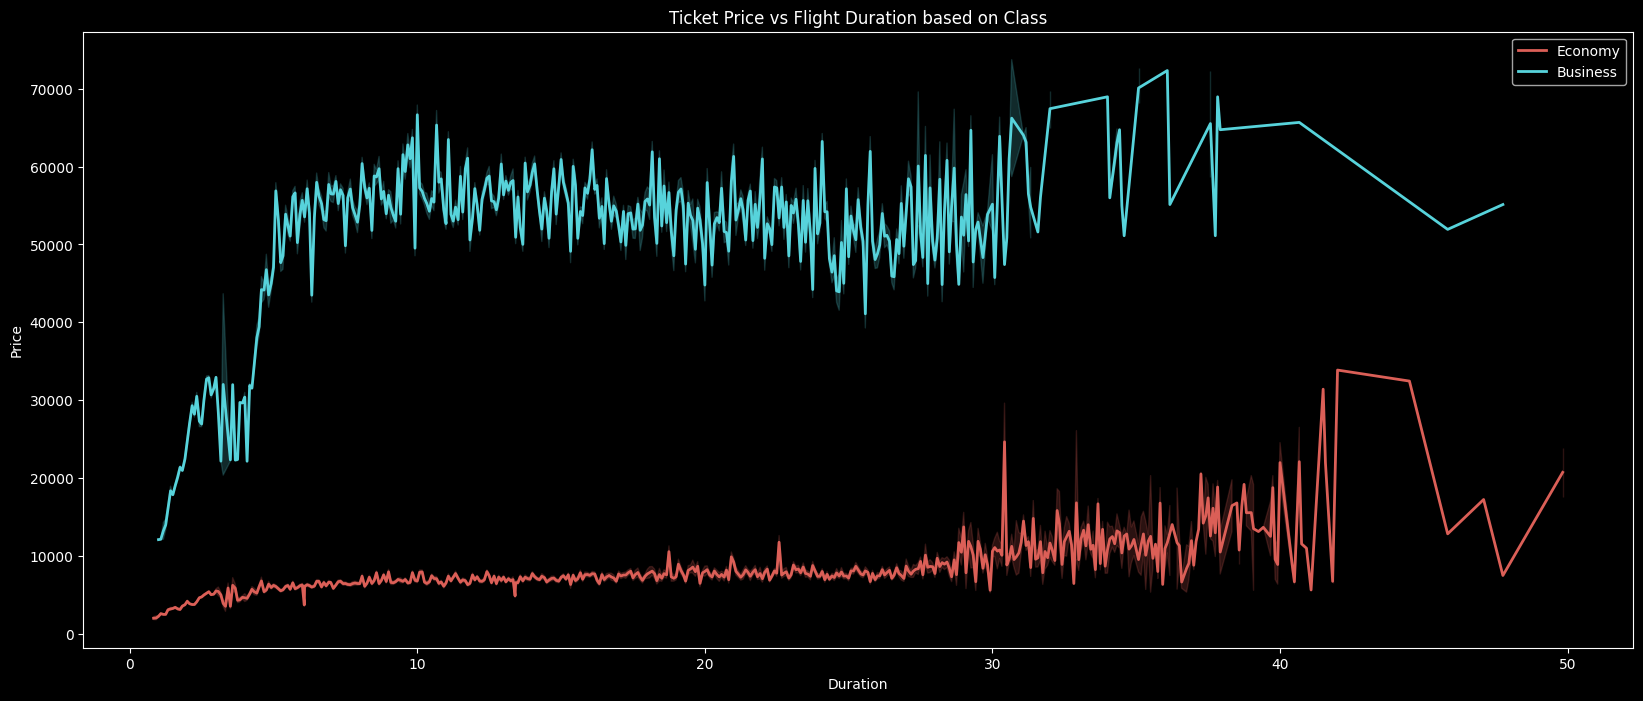

In [46]:
plt.style.use('dark_background')

# Plotting Ticket Price versus Flight Duration based on Class
plt.figure(figsize = (20, 8))
sns.lineplot(data = flight_dataset, x = 'duration', y = 'price', hue = 'class', palette = 'hls', lw = 2)
plt.title('Ticket Price vs Flight Duration based on Class')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.legend()
plt.show()


The line plot shows that there is a trend of price increasing as the durition of the flight increases. This data can help airlines track the popularity of different flight classes and ensure that their resources are being allocated effectively. It can also help tourists determine which class of aircraft is the most popular and select the best class of flight for them.


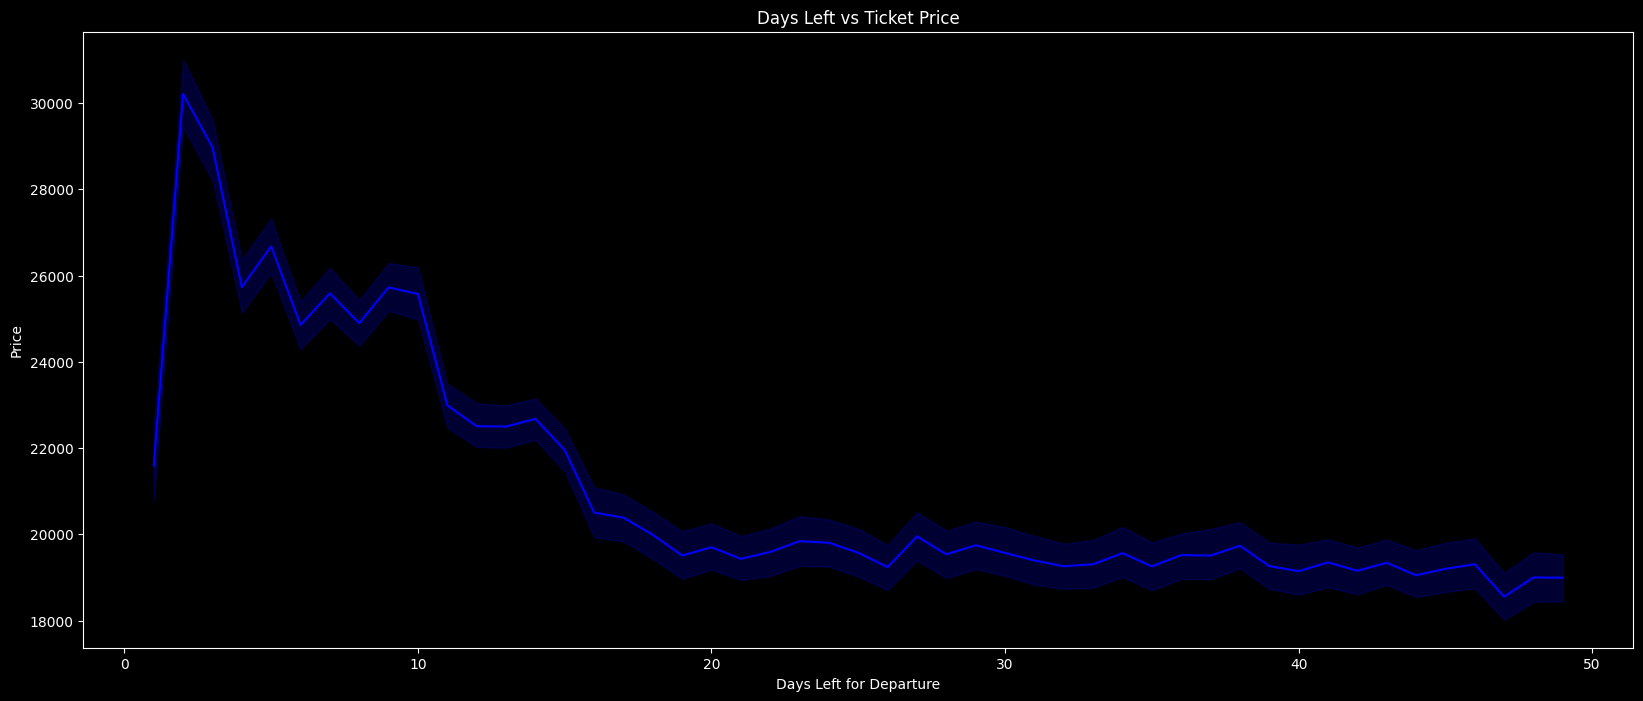

In [47]:
# Plotting Days left for departure vs ticket price
plt.figure(figsize = (20, 8))
sns.lineplot(data = flight_dataset, x = 'days_left', y = 'price', color = 'blue')
plt.title('Days Left vs Ticket Price')
plt.xlabel('Days Left for Departure')
plt.ylabel('Price')
plt.show()

This shows that as the days left for departure are less the price of the ticket increases and when the days are more for departure the price decreases.

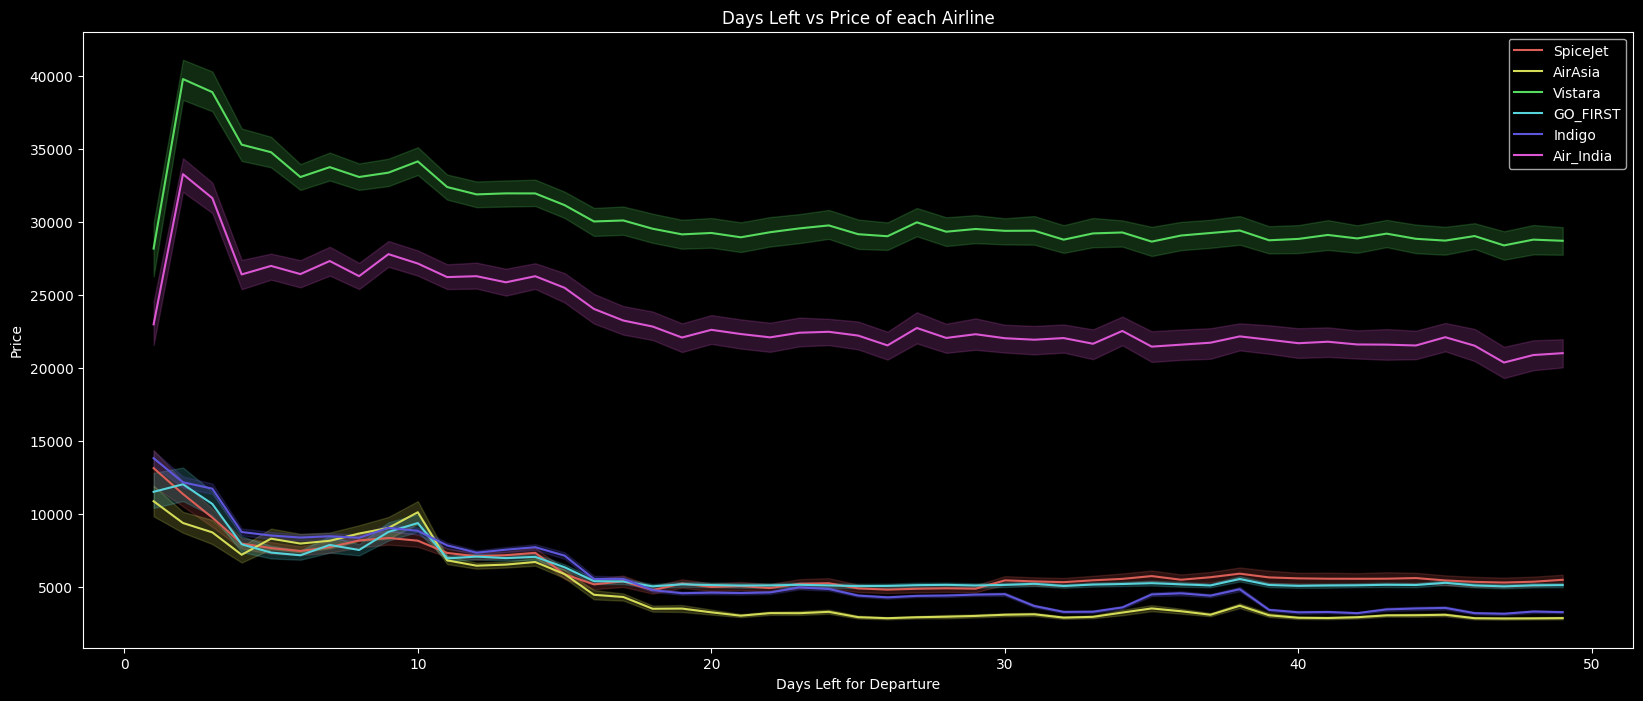

In [48]:
# PLotting days left for depart vs price of each airline
plt.figure(figsize = (20, 8))
sns.lineplot(data = flight_dataset, x = 'days_left', y = 'price', color = 'blue', hue = 'airline', palette = 'hls')
plt.title('Days Left vs Price of each Airline')
plt.legend()
plt.xlabel('Days Left for Departure')
plt.ylabel('Price')
plt.show()

In [49]:
# Grouping the dataset by multiple columns and grouping by source and destination cities and counting the number of flights
flight_count = flight_dataset.groupby(['flight','source_city','destination_city','airline','class'],
           as_index=False).count()
city_flight = flight_count.groupby(['source_city','destination_city'],as_index=False)['flight'].count()

city_flight.head(15)




,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


From the first few rows we can see the number of flights from the source city to the destination city.

In [50]:
# Grouping dataset by city and price
city_price = flight_dataset.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()
city_price.head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [51]:
# copying the dataset
flight_dataset_bk=flight_dataset.copy()

In [52]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in flight_dataset.columns:
    if flight_dataset[col].dtype == 'object':
        flight_dataset[col] = le.fit_transform(flight_dataset[col])

In [53]:
# storing the Dependent Variables in X and Independent Variable in Y
input_features = flight_dataset.drop(['price'],axis = 1)
target_feature = flight_dataset['price']

In [54]:
# Splitting the Data into Training and Testing Sets

flight_x_train, flight_x_test, flight_y_train, flight_y_test = train_test_split(input_features, target_feature, test_size = 0.20, random_state = 57)

flight_x_train.shape, flight_y_test.shape, flight_y_train.shape, flight_y_test.shape

((240122, 11), (60031,), (240122,), (60031,))

In [55]:
# Convert the int values to Machine Languages

scaler = MinMaxScaler(feature_range = (0, 1))
flight_x_train = scaler.fit_transform(flight_x_train)
flight_x_test = scaler.fit_transform(flight_x_test)
flight_x_train = pd.DataFrame(flight_x_train)
flight_x_test = pd.DataFrame(flight_x_test)

In [56]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV

linear_regression_model = LinearRegression()

# Hyperparameter tuning using GridSearchCV
linear_regression_para_grid = {'fit_intercept': [True, False]}

linear_regression_grid_search = GridSearchCV(linear_regression_model, linear_regression_para_grid, cv = 5, scoring = 'neg_mean_squared_error')
linear_regression_grid_search.fit(flight_x_train, flight_y_train)

print("Best parameters for Linear Regression Model: ", linear_regression_grid_search.best_params_)


Best parameters for Linear Regression Model:  {'fit_intercept': True}


In [57]:
# Decision Tree Regressor Model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()

# Hyperparameter grid for regression
decision_tree_param_grid = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "max_features": ["sqrt", "log2"],
    "max_depth": [2, 3, 4, 5]
}

# Using RandomSearchCV instead of GridSearchCV to reduce the runtime
decision_tree_random_search = RandomizedSearchCV(decision_tree_model, decision_tree_param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=57)
decision_tree_random_search.fit(flight_x_train, flight_y_train)
print("Best parameters for Decision Tree (Regression):", decision_tree_random_search.best_params_)


Best parameters for Decision Tree (Regression): {'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'friedman_mse'}


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

random_forest_model = RandomForestRegressor()

# Hyperparameter grid for regression
random_forest_param_grid = {
    "n_estimators": [2, 5, 9, 10],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# Create the RandomizedSearchCV object
random_forest_random_search = RandomizedSearchCV(random_forest_model, random_forest_param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV object to the data
random_forest_random_search.fit(flight_x_train, flight_y_train)

# Print the best parameters
print("Best parameters for Random Forest (Regression):", random_forest_random_search.best_params_)



Best parameters for Random Forest (Regression): {'n_estimators': 9, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [59]:
# KNN Regressor Model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsRegressor()

# Hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid_search.fit(flight_x_train, flight_y_train)

print("Best parameters for K-Nearest Neighbors Regressor (KNN):", knn_grid_search.best_params_)


Best parameters for K-Nearest Neighbors Regressor (KNN): {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


<h1>Training the models with best hyperparameters</h1>


In [60]:
# Fitting the Linear Regression model with the best hyperparameters 
Linear_Regression_model = LinearRegression(fit_intercept = True)

Linear_Regression_model.fit(flight_x_train, flight_y_train)
Linear_Regression_train_pred = Linear_Regression_model.predict(flight_x_train)

In [68]:
linear_model_mse_train = mean_squared_error(flight_y_train, Linear_Regression_train_pred)
linear_model_r2_train = r2_score(flight_y_train, Linear_Regression_train_pred)
linear_model_mae_train = mean_absolute_error(flight_y_train, Linear_Regression_train_pred)
linear_model_rmse_train = np.sqrt(linear_model_mse_train)
linear_model_mape_train = np.mean(np.abs((flight_y_train - Linear_Regression_train_pred) / flight_y_train)) * 100

print("Mean Squared Error (MSE) - Training: ", linear_model_mse_train)
print("R-squared (R2) - Training: ", linear_model_r2_train)
print("Mean Absolute Error (MAE) - Training: ", linear_model_mae_train)
print("Root Mean Squared Error (RMSE) - Training: ", linear_model_rmse_train)
print("Mean Absolute Percentage Error (MAPE) - Training: ", linear_model_mape_train)

Mean Squared Error (MSE) - Training:  49053975.12178479
R-squared (R2) - Training:  0.9046580053773554
Mean Absolute Error (MAE) - Training:  4634.303920647852
Root Mean Squared Error (RMSE) - Training:  7003.8543047228495
Mean Absolute Percentage Error (MAPE) - Training:  43.557642746268


In [61]:
# Fitting the Decision Tree Regressor model with the best hyperparameters
decision_tree_model = DecisionTreeRegressor(max_features='sqrt', max_depth=5, criterion='friedman_mse')

decision_tree_model.fit(flight_x_train, flight_y_train)
decision_tree_model_train_pred = decision_tree_model.predict(flight_x_train)


In [69]:
dt_model_mse_train = mean_squared_error(flight_y_train, decision_tree_model_train_pred)
dt_model_r2_train = r2_score(flight_y_train, decision_tree_model_train_pred)
dt_model_mae_train = mean_absolute_error(flight_y_train, decision_tree_model_train_pred)
dt_model_rmse_train = np.sqrt(decision_tree_model_train_pred)
dt_model_mape_train = np.mean(np.abs((flight_y_train - decision_tree_model_train_pred) / flight_y_train)) * 100

print("Mean Squared Error (MSE) - Training: ", dt_model_mse_train)
print("R-squared (R2) - Training: ", dt_model_r2_train)
print("Mean Absolute Error (MAE) - Training: ", dt_model_mae_train)
print("Root Mean Squared Error (RMSE) - Training: ", dt_model_rmse_train)
print("Mean Absolute Percentage Error (MAPE) - Training: ", dt_model_mape_train)

Mean Squared Error (MSE) - Training:  106280327.02643898
R-squared (R2) - Training:  0.7934320645229906
Mean Absolute Error (MAE) - Training:  6383.354215560877
Root Mean Squared Error (RMSE) - Training:  [ 80.6023122   77.76516734  62.81572065 ...  80.6023122  111.85759589
 246.50882369]
Mean Absolute Percentage Error (MAPE) - Training:  60.18904369169662


In [62]:
# Fitting the Random Forest Regressor model with the best hyperparameters

random_forest_model = RandomForestRegressor(n_estimators=9, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=None)
random_forest_model.fit(flight_x_train, flight_y_train)
random_forest_model_train_pred = random_forest_model.predict(flight_x_train)

In [70]:
rf_model_mse_train = mean_squared_error(flight_y_train, random_forest_model_train_pred)
rf_model_r2_train = r2_score(flight_y_train, random_forest_model_train_pred)
rf_model_mae_train = mean_absolute_error(flight_y_train, random_forest_model_train_pred)
rf_model_rmse_train = np.sqrt(random_forest_model_train_pred)
rf_model_mape_train = np.mean(np.abs((flight_y_train - random_forest_model_train_pred) / flight_y_train)) * 100

print("Mean Squared Error (MSE) - Training: ", rf_model_mse_train)
print("R-squared (R2) - Training: ", rf_model_r2_train)
print("Mean Absolute Error (MAE) - Training: ", rf_model_mae_train)
print("Root Mean Squared Error (RMSE) - Training: ", rf_model_rmse_train)
print("Mean Absolute Percentage Error (MAPE) - Training: ", rf_model_mape_train)

Mean Squared Error (MSE) - Training:  2218642.0388125572
R-squared (R2) - Training:  0.9956878161900461
Mean Absolute Error (MAE) - Training:  588.0217951874868
Root Mean Squared Error (RMSE) - Training:  [ 68.83286252  89.21696401  89.91883465 ...  86.1684397  103.34408546
 248.04511238]
Mean Absolute Percentage Error (MAPE) - Training:  3.9211176977530244


In [63]:
# Fitting the K-Nearest Neighbors Regressor model with the best hyperparameters

knn_model = KNeighborsRegressor(n_neighbors=5, p=1, weights='distance')
knn_model.fit(flight_x_train, flight_y_train)
knn_model_train_pred = knn_model.predict(flight_x_train)

In [71]:
knn_model_mse_train = mean_squared_error(flight_y_train, knn_model_train_pred)
knn_model_r2_train = r2_score(flight_y_train, knn_model_train_pred)
knn_model_mae_train = mean_absolute_error(flight_y_train, knn_model_train_pred)
knn_model_rmse_train = np.sqrt(knn_model_train_pred)
knn_model_mape_train = np.mean(np.abs((flight_y_train - knn_model_train_pred) / flight_y_train)) * 100

print("Mean Squared Error (MSE) - Training: ", knn_model_mse_train)
print("R-squared (R2) - Training: ", knn_model_r2_train)
print("Mean Absolute Error (MAE) - Training: ", knn_model_mae_train)
print("Root Mean Squared Error (RMSE) - Training: ", knn_model_rmse_train)
print("Mean Absolute Percentage Error (MAPE) - Training: ", knn_model_mape_train)

Mean Squared Error (MSE) - Training:  0.0
R-squared (R2) - Training:  1.0
Mean Absolute Error (MAE) - Training:  0.0
Root Mean Squared Error (RMSE) - Training:  [ 65.03845017  88.13058493  82.58329129 ...  86.1684397  103.34408546
 270.73418698]
Mean Absolute Percentage Error (MAPE) - Training:  0.0


<h1>Testing the models with test dataset</h1>

Mean Squared Error (MSE) - Testing:  49424301.361184604
R-squared (R2) - Testing:  0.904566572713241
Mean Absolute Error (MAE) - Testing:  4664.8403886363685
Root Mean Squared Error (RMSE) - Testing:  7030.241913418386
Mean Absolute Percentage Error (MAPE) - Testing:  44.033064519538726


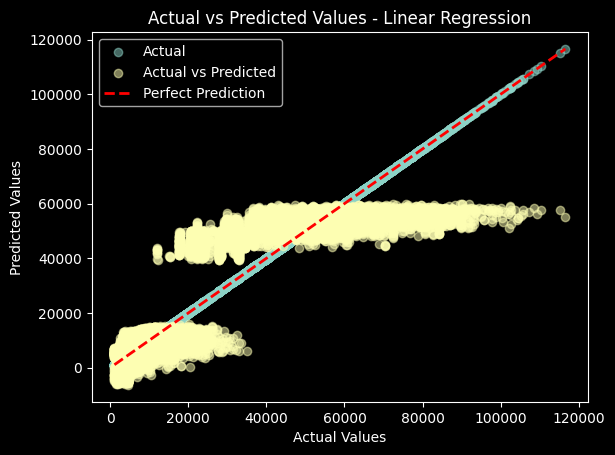

In [95]:
# testing Linear Regression model
Linear_Regression_test_pred = Linear_Regression_model.predict(flight_x_test)

linear_model_mse_test = mean_squared_error(flight_y_test, Linear_Regression_test_pred)
linear_model_r2_test = r2_score(flight_y_test, Linear_Regression_test_pred)
linear_model_mae_test = mean_absolute_error(flight_y_test, Linear_Regression_test_pred)
linear_model_rmse_test = np.sqrt(linear_model_mse_test)
linear_model_mape_test = np.mean(np.abs((flight_y_test - Linear_Regression_test_pred) / flight_y_test)) * 100

print("Mean Squared Error (MSE) - Testing: ", linear_model_mse_test)
print("R-squared (R2) - Testing: ", linear_model_r2_test)
print("Mean Absolute Error (MAE) - Testing: ", linear_model_mae_test)
print("Root Mean Squared Error (RMSE) - Testing: ", linear_model_rmse_test)
print("Mean Absolute Percentage Error (MAPE) - Testing: ", linear_model_mape_test)

# Scatter plot for actual values
plt.scatter(flight_y_test, flight_y_test, label='Actual', alpha=0.5)

# Scatter plot for actual vs predicted values
plt.scatter(flight_y_test, Linear_Regression_test_pred, label='Actual vs Predicted', alpha=0.5)
plt.plot([min(flight_y_test), max(flight_y_test)], [min(flight_y_test), max(flight_y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Values - Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Mean Squared Error (MSE) - Training:  114807038.86192627
R-squared (R2) - Training:  0.7783189869459157
Mean Absolute Error (MAE) - Training:  6756.0736059454985
Root Mean Squared Error (RMSE) - Training:  10714.804658131956
Mean Absolute Percentage Error (MAPE) - Training:  65.14939402855666


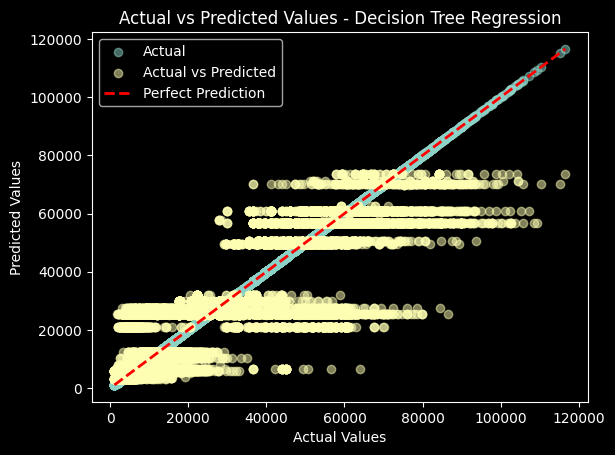

In [96]:
# testing Decision Tree model
decision_tree_model_test_pred = decision_tree_model.predict(flight_x_test)

dt_model_mse_test = mean_squared_error(flight_y_test, decision_tree_model_test_pred)
dt_model_r2_test = r2_score(flight_y_test, decision_tree_model_test_pred)
dt_model_mae_test = mean_absolute_error(flight_y_test, decision_tree_model_test_pred)
dt_model_rmse_test = np.sqrt(dt_model_mse_test)
dt_model_mape_test = np.mean(np.abs((flight_y_test - decision_tree_model_test_pred) / flight_y_test)) * 100

print("Mean Squared Error (MSE) - Training: ", dt_model_mse_test)
print("R-squared (R2) - Training: ", dt_model_r2_test)
print("Mean Absolute Error (MAE) - Training: ", dt_model_mae_test)
print("Root Mean Squared Error (RMSE) - Training: ", dt_model_rmse_test)
print("Mean Absolute Percentage Error (MAPE) - Training: ", dt_model_mape_test)

# Scatter plot for actual values
plt.scatter(flight_y_test, flight_y_test, label='Actual', alpha=0.5)

# Scatter plot for actual vs predicted values
plt.scatter(flight_y_test, decision_tree_model_test_pred, label='Actual vs Predicted', alpha=0.5)
plt.plot([min(flight_y_test), max(flight_y_test)], [min(flight_y_test), max(flight_y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Values - Decision Tree Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

In [76]:
# testing random forest model

random_forest_model_test_pred = random_forest_model.predict(flight_x_test)

rf_model_mse_test = mean_squared_error(flight_y_test, random_forest_model_test_pred)
rf_model_r2_test = r2_score(flight_y_test, random_forest_model_test_pred)
rf_model_mae_test = mean_absolute_error(flight_y_test, random_forest_model_test_pred)
rf_model_rmse_test = np.sqrt(rf_model_mse_test)
rf_model_mape_test = np.mean(np.abs((flight_y_test - random_forest_model_test_pred) / flight_y_test)) * 100

print("Mean Squared Error (MSE) - Training: ",rf_model_mse_test)
print("R-squared (R2) - Training: ", rf_model_r2_test)
print("Mean Absolute Error (MAE) - Training: ", rf_model_mae_test)
print("Root Mean Squared Error (RMSE) - Training: ", rf_model_rmse_test)
print("Mean Absolute Percentage Error (MAPE) - Training: ",rf_model_mape_test)

Mean Squared Error (MSE) - Training:  10332169.963233775
R-squared (R2) - Training:  0.9800496038639994
Mean Absolute Error (MAE) - Training:  1517.5130520709547
Root Mean Squared Error (RMSE) - Training:  3214.3692947814466
Mean Absolute Percentage Error (MAPE) - Training:  10.536827126660732


In [77]:
# testing KNN model

knn_model_test_pred = knn_model.predict(flight_x_test)

knn_model_mse_test = mean_squared_error(flight_y_test, knn_model_test_pred)
knn_model_r2_test = r2_score(flight_y_test, knn_model_test_pred)
knn_model_mae_test = mean_absolute_error(flight_y_test, knn_model_test_pred)
knn_model_rmse_test = np.sqrt(knn_model_mse_test)
knn_model_mape_test = np.mean(np.abs((flight_y_test - knn_model_test_pred) / flight_y_test)) * 100

print("Mean Squared Error (MSE) - Training: ",knn_model_mse_test)
print("R-squared (R2) - Training: ", knn_model_r2_test)
print("Mean Absolute Error (MAE) - Training: ",knn_model_mae_test)
print("Root Mean Squared Error (RMSE) - Training: ", knn_model_rmse_test)
print("Mean Absolute Percentage Error (MAPE) - Training: ",knn_model_mape_test)

Mean Squared Error (MSE) - Training:  14904134.0698299
R-squared (R2) - Training:  0.9712215943199499
Mean Absolute Error (MAE) - Training:  1807.021901991404
Root Mean Squared Error (RMSE) - Training:  3860.587270070436
Mean Absolute Percentage Error (MAPE) - Training:  10.387699838221927


<h1>Plotting the Performance Metrics</h1>



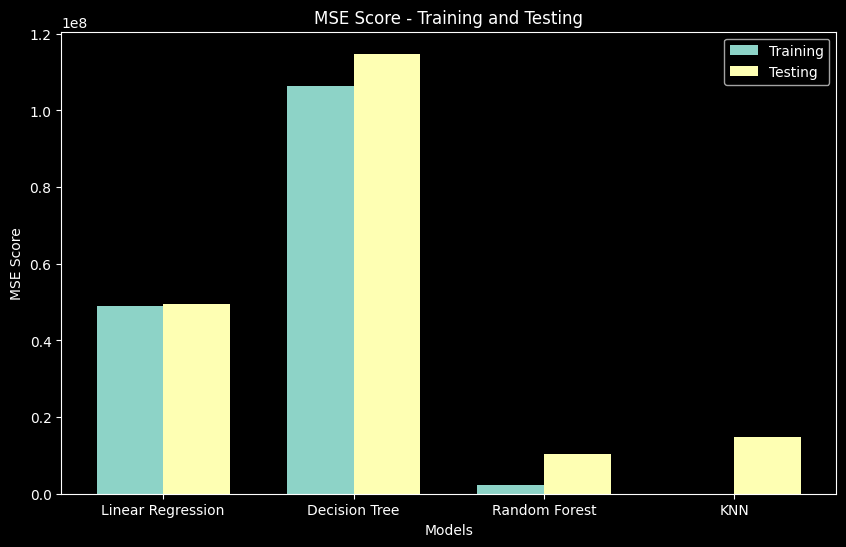

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']

# MSE scores for training and testing
mse_train_scores = [linear_model_mse_train, dt_model_mse_train, rf_model_mse_train, knn_model_mse_train]
mse_test_scores = [linear_model_mse_test, dt_model_mse_test, rf_model_mse_test, knn_model_mse_test]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(model_names))

bar1 = ax.bar(index, mse_train_scores, bar_width, label='Training')
bar2 = ax.bar(index + bar_width, mse_test_scores, bar_width, label='Testing')

ax.set_xlabel('Models')
ax.set_ylabel('MSE Score')
ax.set_title('MSE Score - Training and Testing')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()



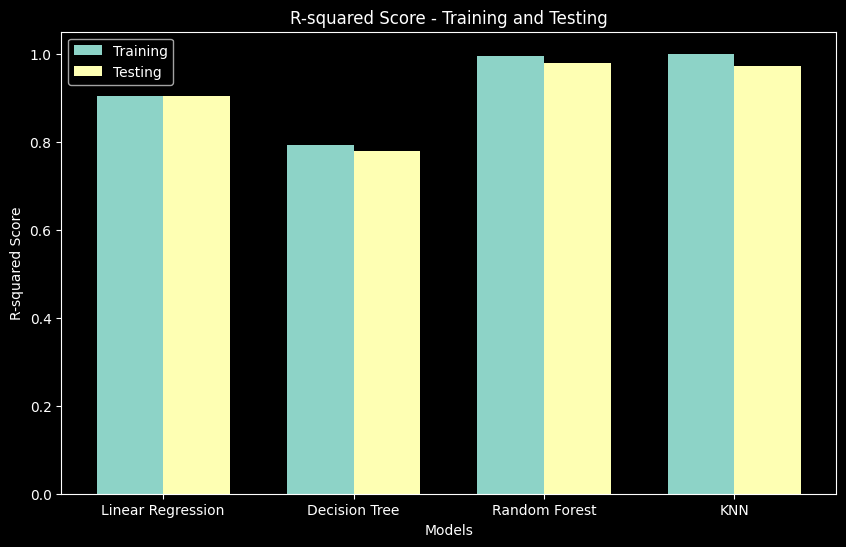

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']

# R-squared scores for training and testing
r2_train_scores = [linear_model_r2_train, dt_model_r2_train, rf_model_r2_train, knn_model_r2_train]
r2_test_scores = [linear_model_r2_test, dt_model_r2_test, rf_model_r2_test, knn_model_r2_test]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(model_names))

bar1 = ax.bar(index, r2_train_scores, bar_width, label='Training')
bar2 = ax.bar(index + bar_width, r2_test_scores, bar_width, label='Testing')

ax.set_xlabel('Models')
ax.set_ylabel('R-squared Score')
ax.set_title('R-squared Score - Training and Testing')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()


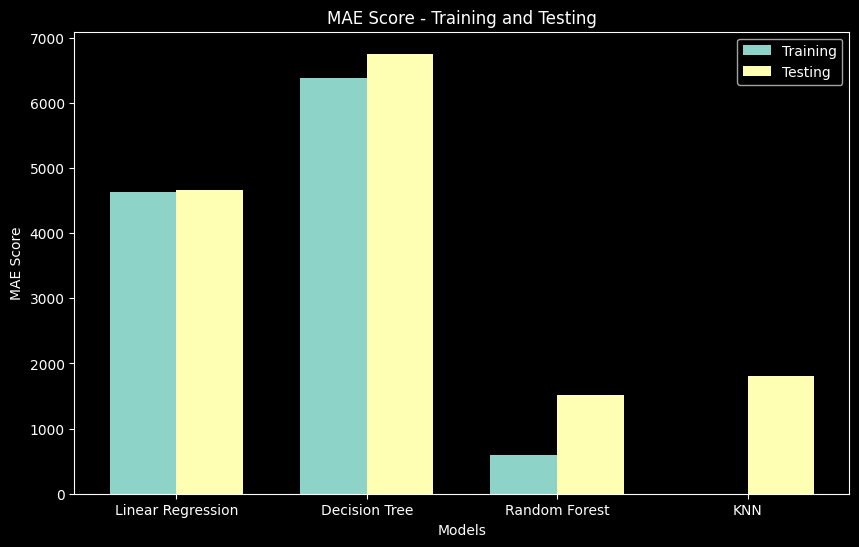

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']

# MAE scores for training and testing
mae_train_scores = [linear_model_mae_train, dt_model_mae_train, rf_model_mae_train, knn_model_mae_train]
mae_test_scores = [linear_model_mae_test, dt_model_mae_test, rf_model_mae_test, knn_model_mae_test]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(model_names))

bar1 = ax.bar(index, mae_train_scores, bar_width, label='Training')
bar2 = ax.bar(index + bar_width, mae_test_scores, bar_width, label='Testing')

ax.set_xlabel('Models')
ax.set_ylabel('MAE Score')
ax.set_title('MAE Score - Training and Testing')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()


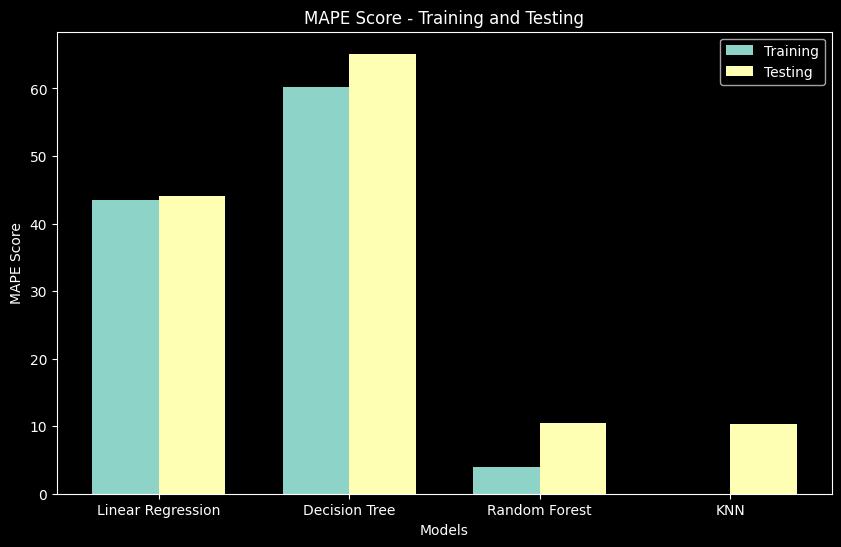

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN']

# MAPE scores for training and testing
mape_train_scores = np.array([linear_model_mape_train, dt_model_mape_train, rf_model_mape_train, knn_model_mape_train], dtype=float)
mape_test_scores = np.array([linear_model_mape_test, dt_model_mape_test, rf_model_mape_test, knn_model_mape_test], dtype=float)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(model_names))

bar1 = ax.bar(index, mape_train_scores, bar_width, label='Training')
bar2 = ax.bar(index + bar_width, mape_test_scores, bar_width, label='Testing')

ax.set_xlabel('Models')
ax.set_ylabel('MAPE Score')
ax.set_title('MAPE Score - Training and Testing')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()
